In [9]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='*******', project_access_token='*******')
pc = project.project_context
CompanyA_complaints =project.get_file('CompanyA Complaints.csv')
CompanyB_complaints =project.get_file('CompanyB Complaints.csv')
CompanyA_total =project.get_file('CompanyA Total.csv')
CompanyB_total =project.get_file('CompanyB Total.csv')
# !pip install matplotlib==3.4.3
# !pip list --isolated

<h1>IS THE PRODUCT FAULTY OR IS THE VENDOR.</h1>
<h3>Comparing our company's product data with our opponent's.</h3>
<p>Suppose we are a printer manufacturing company (Company B). The Company A also manfactures printers therefore it's our rivel.</p>
</br>
<p>We have four csv files: <br>
   <ul>
       <li>"CompanyA Total.csv" : All the product id's of products sold by Company A.</li>
       <li>"CompanyA Complaints.csv" : All the product id's and complaint id's registerd for Company A's product.</li>
       <li>"CompanyB Total.csv" : All the product id's of products sold by Company B.</li>
       <li>"CompanyB Complaints.csv" : All the product id's and complaint id's registerd for Company B's product.</li>
   </ul>
</p>

In [10]:
#importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<p>Reading all 4 files into pandas DataFrame.</p>

In [11]:
df_companyA_complaints =pd.read_csv(CompanyA_complaints)
df_companyB_complaints =pd.read_csv(CompanyB_complaints)

df_companyA_total =pd.read_csv(CompanyA_total)
df_companyB_total =pd.read_csv(CompanyB_total)

,product_id
0,24082
1,23954
2,21846
3,24560
4,22093


<p>Grouping complaints on the Product ID for both Company A and B.</p>

In [16]:
df_agg_complaintA =df_companyA_complaints.pivot_table(values ='complaint_id', index ='product_id', aggfunc ='count')
df_agg_complaintA.reset_index(inplace =True)

df_agg_complaintB =df_companyB_complaints.pivot_table(values ='complaint_id', index ='product_id', aggfunc ='count')
df_agg_complaintB.reset_index(inplace =True)

<p>Joining the both company's grouped complaint data with the respective total product data.</p>

In [17]:
df_agg_complaintA =df_companyA_total.merge(df_agg_complaintA, on='product_id', how='left').fillna(0)
df_agg_complaintA.columns =['Product ID', 'Number of complaints']

df_agg_complaintB =df_companyB_total.merge(df_agg_complaintB, on='product_id', how='left').fillna(0)
df_agg_complaintB.columns =['Product ID', 'Number of complaints']

<p>Doing statistical analysis...</p>

In [20]:
#applying some statistics
print(df_agg_complaintA['Number of complaints'].median())
# print(df_agg_complaintA.median())
print(df_agg_complaintB['Number of complaints'].median())
# print(df_agg_complaintB.median())

4.0
9.0


<h3>Visualising the data of Company A and Company B.</h3>

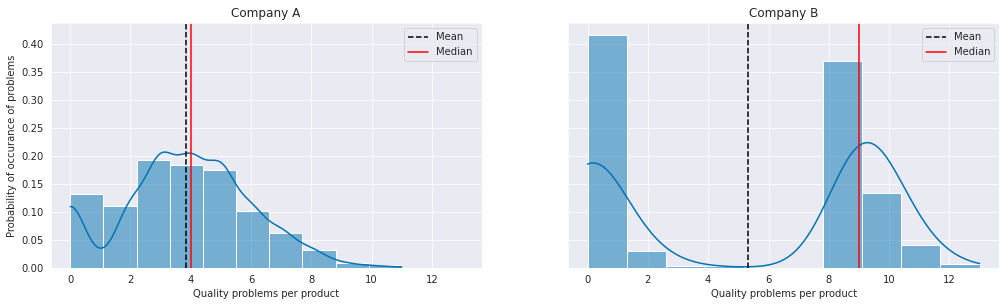

<Figure size 432x288 with 0 Axes>

In [21]:
sns.set_style('darkgrid')
sns.set_palette('colorblind')
fig, (ax0, ax1) =plt.subplots(nrows =1, ncols =2, sharey =True, sharex =True, figsize =(17, 4.5))

#Company A
sns.histplot(x ='Number of complaints', stat ='probability', bins =10, data =df_agg_complaintA, kde =True, ax =ax0)
ax0.set(xlabel ='Quality problems per product', ylabel ='Probability of occurance of problems', title ='Company A')
ax0.axvline(x= df_agg_complaintA['Number of complaints'].mean(), label ='Mean', linestyle ='--', color ='black')
ax0.axvline(x= df_agg_complaintA['Number of complaints'].median(), label ='Median', linestyle ='-', color ='red')
ax0.legend()

#Company B
sns.histplot(x ='Number of complaints', stat ='probability', bins =10, data =df_agg_complaintB, kde =True, ax =ax1)
ax1.set(xlabel ='Quality problems per product', ylabel ='Probability of occurance of problems', title ='Company B')
ax1.axvline(x= df_agg_complaintB['Number of complaints'].mean(), label ='Mean', linestyle ='--', color ='black')
ax1.axvline(x= df_agg_complaintB['Number of complaints'].median(), label ='Median', linestyle ='-', color ='red')
ax1.legend()

plt.show()
plt.clf()

<h2>BANGALORE's HOUSE PRICING</h2>
<p>The dataset contains the following columns:</p>
<ul>
    <li><b>area_type:</b> Area Type</li>
    <li><b>availability:</b> Date on which the flat is available to move in.</li>
    <li><b>location:</b> The locality where the flat is located.</li>
    <li><b>size:</b> Size of the flat(in BHK).</li>
    <li><b>society:</b> Society</b></li>
    <li><b>total_sqft:</b> Size of the flat(in square feet).</li>
    <li><b>bath:</b> The number of bathroom(s) available.</li>
    <li><b>balcony:</b> Number of balcony present.</li>
    <li><b>price:</b> Price of flat.</li>
</ul>

In [25]:
#getting data's path and converting it to DataFrame
Bangalore_Housing =project.get_file('Bangalore House Price.csv')
df_housing =pd.read_csv(Bangalore_Housing)
df_housing.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


<h3>Handling Missing Values:</h3>
</p>Missing values in DataFrames are represented by <b>NaN</b>.</p>

In [26]:
#Cleaning the data

#finding out the null values in data
print(df_housing.isna().sum())

#Removing the records for null values in location, size, bath, and balcony columns
df_housing.dropna(axis =0, subset=['location', 'size', 'bath', 'balcony'], inplace =True)
# print(df_housing.isna().sum())

#Replacing NaN value in society column with an empty string ''
df_housing.fillna('', inplace =True)
# print(df_housing.isna().sum())

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64


<h3>Reducing the unique values in dataset</h3>
<p>Here range of values of data in a column are reduced. We will reduce range of 'availability', 'size', 'bath'.</p>
<p>Although 'total_sqft' is important information and it can be reduced to range of values, but the data is very dirty as compared to other columns. Hence it requires a bit more analysis.</p>
<p>So for now this column will not be considered in the analysis.</p>

In [36]:
#finding number of unique values per column
# print(df_housing.nunique(axis =0))
df_housing['bath'].unique()

#grouping 'availability' with respect to months
# def availability_grouping(obj):
#     return obj[-3:-1]+obj[-1]
# df_housing.loc[df_housing['availability'] !='Ready To Move','availability'] =df_housing[df_housing['availability'] !='Ready To Move']['availability'].apply(availability_grouping)
# print(df_housing['availability'].unique())

#replacing 'Bedroom' with BHK in 'size' column
# df_housing['size'] =df_housing['size'].str.replace('Bedroom', 'BHK')
#replacing 'size' value greater than or equals to '4 BHK' to '> 4 BHK'
# df_housing['size'] =df_housing['size'].apply(lambda val: '> 4 BHK' if ((int(val[0]) >4 or int(val[0:2]) >4) and val[2:4] !='RK') else str(val))
# print(df_housing['size'].unique())

#replacing 'bath' value greater than or equals to '4' to '> 4'
# df_housing['bath'] =df_housing['bath'].apply(lambda val: '> 4' if val >4 else str(val))
# print(df_housing['bath'].unique())

#replacing 'total_sqft' values with intervals
# df_housing['total_sqft'] =['0-500' if int(val)<500 else val for val in df_housing['total_sqft']]
# print(df_housing['total_sqft'].unique())

['2.0' '> 4' '3.0' '4.0' '1.0']


<h3>Plotting Scatter Plots</h3>
<p>Visualizing the relationship between all the columns of DataFrame with the '<b>price</b>' column.</p>

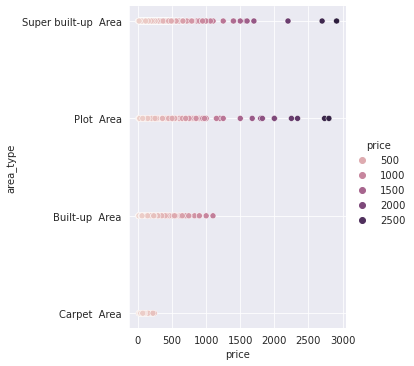

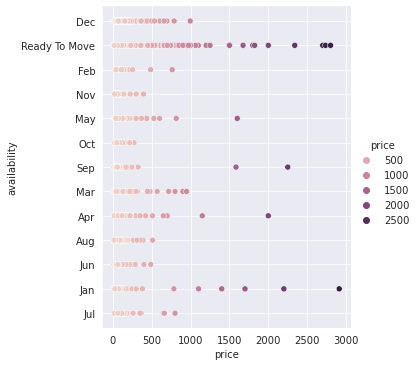

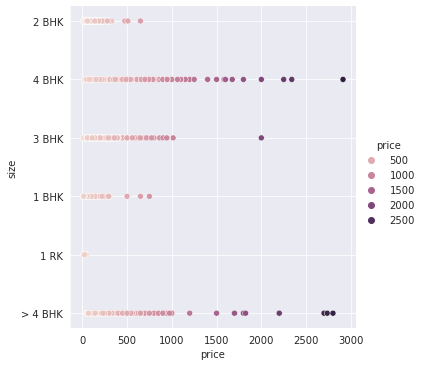

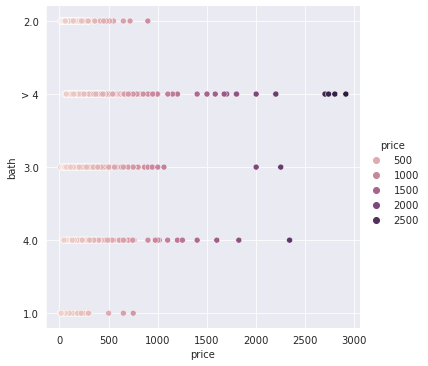

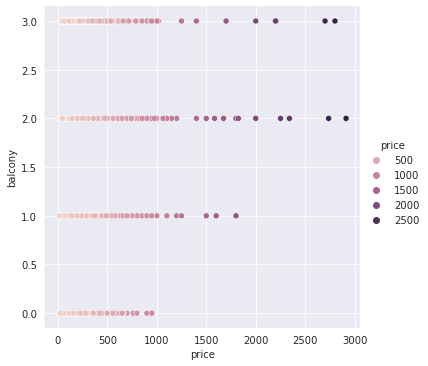

<Figure size 432x288 with 0 Axes>

In [37]:
#area_type, availability, size, bath, balcony : on x-axis
#price : on y-axis
for x in ('area_type', 'availability', 'size', 'bath', 'balcony'): 
    sns.relplot(y =x, x ='price',
                data =df_housing,
                kind ='scatter',
                hue ='price')
#     plt.yticks(rotation =90)
plt.show()
plt.clf()

<h3>Plotting Bar plots</h3>

196.5604844855743


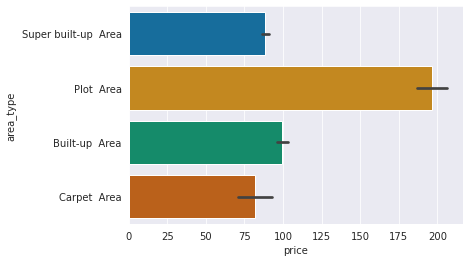

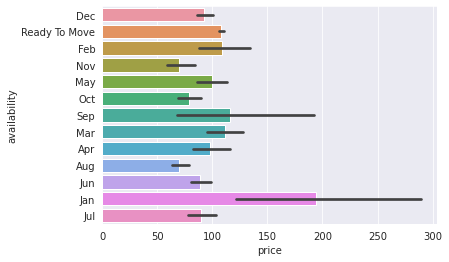

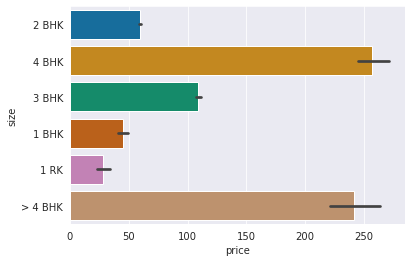

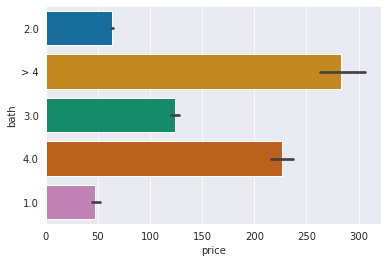

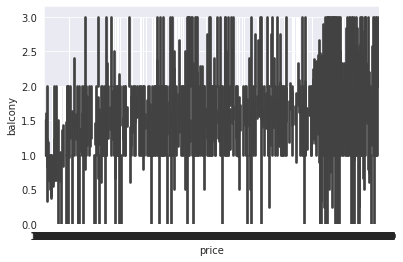

<Figure size 432x288 with 0 Axes>

In [39]:
#area_type, availability, size, bath, balcony : on x-axis
#price : on y-axis
print(df_housing[df_housing['area_type'] =='Plot  Area']['price'].mean())
for x in ('area_type', 'availability', 'size', 'bath', 'balcony'): 
    sns.barplot(y =x, x ='price',
                data =df_housing
            )
    plt.show()
plt.clf()